In [29]:
import numpy as np

In [132]:
N = 10
S = 2
B = 10
r = 1

In [31]:
grid = np.array([[0,1,1,1,1],
                [0,1,1,1,2],
                [0,0,0,2,2],
                [3,0,3,2,2],
                [3,3,3,4,4]])
star = np.array([[0,1,0,0,0],
                [0,0,0,0,1],
                [0,0,1,0,0],
                [1,0,0,0,0],
                [0,0,0,1,0]])

In [130]:
def starbattle_generator(S, N):
    success = False
    coord_grid = np.arange(N*N)
    good_coords = np.zeros((N,2), dtype=int)
    n_attempts = 0
    while not success:
        n_attempts += 1
        coord_grid = np.arange(N*N)
        np.random.shuffle(coord_grid)
        coord_grid = np.array([(i//N,i%N) for i in coord_grid])
        stars = np.zeros((N,N), dtype=int)
        n_placed_stars = 0
        for coord in coord_grid:
            row = np.sum(stars[coord[0]])
            col = np.sum(stars[:,coord[1]])
            rl = max(coord[0]-r, 0)
            rh = min(coord[0]+r+1, N)
            cl = max(coord[1]-r, 0)
            ch = min(coord[1]+r+1, N)
            reg = np.sum(stars[rl:rh, cl:ch])
            if  row+col+reg == 0:
                stars[tuple(coord)] = 1
                good_coords[n_placed_stars,:] = coord
                n_placed_stars += 1
                if n_placed_stars == N:
                    success = True
                    #print(star, n_attempts)
                    break
            else:
                continue
    grid = np.zeros((N*N), dtype=int)
    for n in range(N*N):
        n_coord = (n//N, n%N)
        best_dist = 2*N
        for ind, star in enumerate(good_coords):
            dist = (n_coord[0]-star[0])**2 + (n_coord[1] - star[1])**2
            if best_dist > dist:
                best_dist = dist
                grid[n] = ind
    grid = grid.reshape(N,N)
    nn = grid.max()
    tmp = np.zeros((nn+1, nn+1), bool)

    # check the vertical adjacency
    a, b = grid[:-1, :], grid[1:, :]
    tmp[a[a!=b], b[a!=b]] = True

    # check the horizontal adjacency
    a, b = grid[:, :-1], grid[:, 1:]
    tmp[a[a!=b], b[a!=b]] = True

    # register adjacency in both directions (up, down) and (left,right)
    result = (tmp | tmp.T).astype(int)
    neighbors = [np.flatnonzero(row) for row in result]
    print("It took {} attempt(s) to generate the puzzle.".format(n_attempts))
    return grid, stars, neighbors

In [87]:
stars = np.array([[0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0]])

In [99]:
grid = np.array([[4, 4, 1, 1, 3],
        [4, 1, 1, 1, 3],
        [2, 2, 1, 3, 3],
        [2, 2, 2, 0, 3],
        [2, 2, 0, 0, 0]])

In [118]:
import networkx as nx


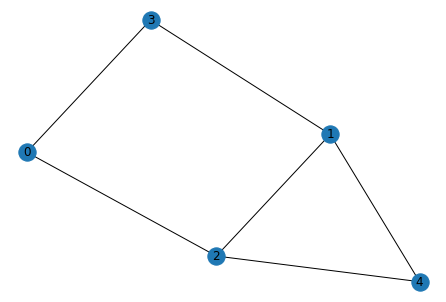

In [122]:
nx.draw(G, with_labels=True)

In [127]:
import metis

ModuleNotFoundError: No module named 'metis'

In [126]:
from networkx.algorithms.community import greedy_modularity_communities, lukes_partitioning

c = list(lukes_partitioning(G,3))

NotATree: lukes_partitioning works only on trees

In [124]:
c

[frozenset({1, 2, 4}), frozenset({0, 3})]

In [116]:
neighbors

[array([2, 3]),
 array([2, 3, 4]),
 array([0, 1, 4]),
 array([0, 1]),
 array([1, 2])]

In [110]:
result

array([[0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 4],
       [3, 0],
       [3, 1],
       [4, 1],
       [4, 2]])

In [107]:
labels = list(range(S))

result

array([[0, 2],
       [0, 3],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 4],
       [3, 0],
       [3, 1],
       [4, 1],
       [4, 2]])

In [134]:
_,_,test = starbattle_generator(S,N)

It took 3 attempt(s) to generate the puzzle.


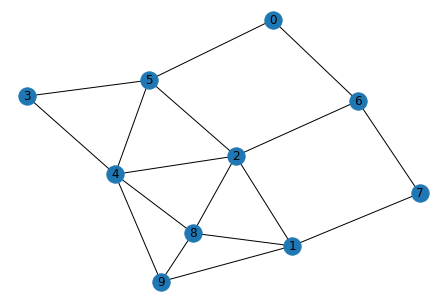

In [136]:
G = nx.Graph()
for ind, neigh in enumerate(test):
    G.add_edges_from([[ind, ne] for ne in neigh])
nx.draw_spring(G, with_labels=True)

In [ ]:
from itertools import product
from string import ascii_uppercase as ABC
from time import time


def _insert_newlines(string, every=128):
    return "\n".join(string[i:i + every] for i in range(0, len(string), every))


def main(grid):
    t0 = time()
    S = grid.count("\n")
    LENGHT = S * S
    N = int(grid[0])
    TOTAL = N * S
    grid = "".join(grid[1:].split())
    possibles = tuple(set(i for i in range(LENGHT) if grid[i] is l)
                    for l in ABC[:S])
    regions = sorted(range(S), key=lambda x: grid.count(ABC[:S][x]))
    adjacent = []
    for a in range(LENGHT):
        cols = [0]
        rows = [0]
        if a % S > 0:
            cols.append(-1)
        if a % S < S - 1:
            cols.append(1)
        if a // S > 0:
            rows.append(-S)
        if a // S < S - 1:
            rows.append(S)
        adjacent.append(set(a + sum(i) for i in product(cols, rows)))
    cs = tuple(set(range(i, LENGHT, S)) for i in range(S))
    rs = (0,) * S + tuple(set(range(i * S, i * S + S)) for i in range(S))
    cr = tuple((i % S, i // S + S) for i in range(LENGHT))

    def solve(grid, impossibles, colrows, count=0):
        if count == TOTAL:
            return grid
        for a in possibles[regions[count // N]] - impossibles:
            c, r = cr[a]
            tryimpossibles = impossibles | adjacent[a]
            trycolrows = colrows[:]
            trycolrows[c] += 1
            trycolrows[r] += 1
            if trycolrows[c] == N:
                tryimpossibles.update(cs[c])
            if trycolrows[r] == N:
                tryimpossibles.update(rs[r])
            s = solve(grid + (a,), tryimpossibles, trycolrows, count + 1)
            if s:
                break
        else:
            return None
        return s
    s = solve((), set(), bytearray(S + S))
    if s:
        s = "".join("*" if i in s else "." for i in range(LENGHT))
        print(_insert_newlines(s, S))
    print("Took", time() - t0, "seconds")